# Wstęp do Sztucznej Inteligencji - rok akademicki 2022/2023

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

## Zadanie 1
Zaimplementuj model preceptronu w postaci klasy.

In [ ]:
import numpy as np

class Perceptron:
    # Inicjalizator, ustawiający atrybut self.w jako wektor losowych wag, n ilość sygnałów wejściowych
    def __init__(self, n):
        self.w = np.random.randn(n)  # Inicjalizacja wag losowymi wartościami
        
    # Metoda obliczająca odpowiedz modelu dla zadanego sygnału wejściowego x=[1,x1,x2,...,xN]
    def predict(self, x):
        y = np.dot(self.w, x)  # Obliczenie sumy iloczynu wag i sygnałów wejściowych
        if y >= 0:
            return 1
        else:
            return -1
        
    # Metoda uczenia według reguły perceptronu, xx - zbiór danych uczących, d - odpowiedzi,
    # eta - współczynnik uczenia,
    # tol - tolerancja (czyli jak duży błąd jesteśmy w stanie zaakceptować)
    def train(self, xx, d, eta, tol):
        error = tol + 1  # Inicjalizacja błędu większą wartością niż tolerancja
        
        while error > tol:
            error = 0
            for i in range(len(xx)):
                x = np.insert(xx[i], 0, 1)  
                y = self.predict(x)  # Obliczenie odpowiedzi modelu
                delta = d[i] - y  # Obliczenie różnicy między oczekiwaną odpowiedzią a rzeczywistą
                
                # Aktualizacja wag
                self.w += eta * delta * x
                
                # Zliczanie błędów
                if delta != 0:
                    error += 1
                    
    # Metoda obliczająca błąd dla danych testowych 
    # zwraca błąd oraz wektor odpowiedzi perceptronu dla danych testowych
    def evaluate_test(self, xx, d):
        error = 0
        predictions = []
        
        for i in range(len(xx)):
            x = np.insert(xx[i], 0, 1)  
            y = self.predict(x)  
            
            # Porównanie odpowiedzi modelu z oczekiwaną odpowiedzią
            if y != d[i]:
                error += 1
                
            predictions.append(y)
            
        return error, predictions

## Zadanie 2
- Stwórz dwa obiekty klasy `Perceptron`. 
- Wczytaj dane z plików `2D.csv` oraz `3D.csv.`
- Pierwszy z perceptronów naucz klasyfikować dane z pliku `2D.csv`, ucz tylko na losowej części danych (np. 80%)
- Drugi z perceptronów naucz klasyfikować dane z pliku `3D.csv`, ucz tylko na losowej części danych (np. 80%)
- Oba zbiory danych są przykładami problemów liniowo separowalnych, a więc należy uczyć modele tak aby uzyskiwać dla danych uczących błąd równy zero.
- Przedstaw rezultaty uczenia na wykresach, odpowiednio 2D lub 3D. Na wykresach powinny znaleźć się dane testowe, tzn. te które nie były wykorzystywane w trakcie uczenia oraz linia (płaszczyzna) rozdzielająca klasy.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Perceptron:
    def __init__(self, n):
        self.w = np.random.randn(n)
        
    def predict(self, x):
        y = np.dot(self.w, x)
        if y >= 0:
            return 1
        else:
            return -1
        
    def train(self, xx, d, eta, tol):
        error = tol + 1
        
        while error > tol:
            error = 0
            for i in range(len(xx)):
                x = np.insert(xx[i], 0, 1)
                y = self.predict(x)
                delta = d[i] - y
                self.w += eta * delta * x
                if delta != 0:
                    error += 1
                    
    def evaluate_test(self, xx, d):
        error = 0
        predictions = []
        
        for i in range(len(xx)):
            x = np.insert(xx[i], 0, 1)
            y = self.predict(x)
            if y != d[i]:
                error += 1
            predictions.append(y)
            
        return error, predictions


# Wczytanie danych 2D
!wget https://torus.uck.pk.edu.pl/~bar.olaf/2D.csv
data_2d = pd.read_csv('2D.csv')
X_2d = data_2d[['x1', 'x2']].values
y_2d = data_2d['label'].values

# Podział danych na zbiór uczący i testowy
train_size = int(0.8 * len(X_2d))
X_train_2d = X_2d[:train_size]
y_train_2d = y_2d[:train_size]
X_test_2d = X_2d[train_size:]
y_test_2d = y_2d[train_size:]

# Uczenie pierwszego perceptronu na danych 2D
perceptron_2d = Perceptron(n=3)
perceptron_2d.train(X_train_2d, y_train_2d, eta=0.1, tol=0)

# Wykres dla danych 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test_2d)
x_min, x_max = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1
y_min, y_max = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = np.array([perceptron_2d.predict(np.array([1, x1, x2])) for x1, x2 in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5)
plt.title('Perceptron - 2D')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Wczytanie danych 3D
!wget https://torus.uck.pk.edu.pl/~bar.olaf/3D.csv
data_3d = pd.read_csv('3D.csv')
X_3d = data_3d[['x1', 'x2', 'x3']].values
y_3d = data_3d['label'].values

# Podział danych na zbiór uczący i testowy
train_size = int(0.8 * len(X_3d))
X_train_3d = X_3d[:train_size]
y_train_3d = y_3d[:train_size]
X_test_3d = X_3d[train_size:]
y_test_3d = y_3d[train_size:]

# Uczenie drugiego perceptronu na danych 3D
perceptron_3d = Perceptron(n=4)
perceptron_3d.train(X_train_3d, y_train_3d, eta=0.1, tol=0)

# Wykres dla danych 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_3d[:, 0], X_test_3d[:, 1], X_test_3d[:, 2], c=y_test_3d)
x_min, x_max = X_test_3d[:, 0].min() - 1, X_test_3d[:, 0].max() + 1
y_min, y_max = X_test_3d[:, 1].min() - 1, X_test_3d[:, 1].max() + 1
z_min, z_max = X_test_3d[:, 2].min() - 1, X_test_3d[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2), np.arange(z_min, z_max, 0.2))
points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z = np.array([perceptron_3d.predict(np.array([1, x1, x2, x3])) for x1, x2, x3 in points])
Z = Z.reshape(xx.shape)
ax.voxels(xx, yy, zz, Z, edgecolor='k', alpha=0.5)
ax.set_title('Perceptron - 3D')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

--2023-06-02 21:03:32--  https://torus.uck.pk.edu.pl/~bar.olaf/2D.csv
Resolving torus.uck.pk.edu.pl (torus.uck.pk.edu.pl)... 149.156.136.154
Connecting to torus.uck.pk.edu.pl (torus.uck.pk.edu.pl)|149.156.136.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13907 (14K) [text/csv]
Saving to: ‘2D.csv.2’

2D.csv.2            100%[===================>]  13.58K  --.-KB/s    in 0s      

2023-06-02 21:03:32 (177 MB/s) - ‘2D.csv.2’ saved [13907/13907]



KeyError: ignored

Wynik dla  3D:

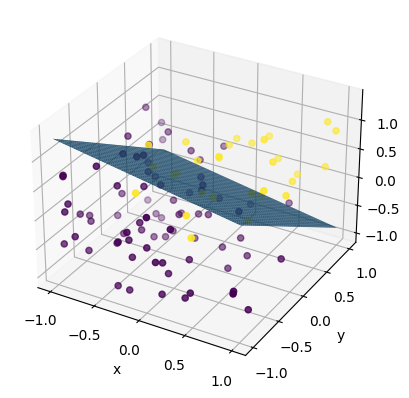

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pobranie plików CSV za pomocą powłoki bash w Colabie
!wget https://torus.uck.pk.edu.pl/~bar.olaf/2D.csv
!wget https://torus.uck.pk.edu.pl/~bar.olaf/3D.csv

# Wczytanie danych z plików CSV
data_2d = pd.read_csv('2D.csv', sep=';')
data_3d = pd.read_csv('3D.csv', sep=';')

# Sprawdzenie danych wczytanych dla danych 2D
print(data_2d.head())

# Sprawdzenie danych wczytanych dla danych 3D
print(data_3d.head())

--2023-06-01 22:59:22--  https://torus.uck.pk.edu.pl/~bar.olaf/2D.csv
Resolving torus.uck.pk.edu.pl (torus.uck.pk.edu.pl)... 149.156.136.154
Connecting to torus.uck.pk.edu.pl (torus.uck.pk.edu.pl)|149.156.136.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13907 (14K) [text/csv]
Saving to: ‘2D.csv.9’

2D.csv.9            100%[===================>]  13.58K  --.-KB/s    in 0.1s    

2023-06-01 22:59:23 (119 KB/s) - ‘2D.csv.9’ saved [13907/13907]

--2023-06-01 22:59:23--  https://torus.uck.pk.edu.pl/~bar.olaf/3D.csv
Resolving torus.uck.pk.edu.pl (torus.uck.pk.edu.pl)... 149.156.136.154
Connecting to torus.uck.pk.edu.pl (torus.uck.pk.edu.pl)|149.156.136.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20114 (20K) [text/csv]
Saving to: ‘3D.csv.9’

3D.csv.9            100%[===================>]  19.64K  --.-KB/s    in 0.1s    

2023-06-01 22:59:23 (172 KB/s) - ‘3D.csv.9’ saved [20114/20114]

            500             2  Unnamed: 2


&copy; Katedra Informatyki, Politechnika Krakowska